# Fast Gradient Method Attack and Binary Input Detector Using MNIST10

## **Fast Gradient Sign Method (FGSM) Attack - Overview**

The Fast Gradient Sign Method (FGSM) is one of the *simplest and most widely used techniques* for generating adversarial examples. It was introduced by **Ian Goodfellow et al**. in 2014 as a method to quickly generate adversarial examples to evaluate the vulnerability of machine learning models, particularly neural networks.

The core idea of FGSM is to perturb the original input data by a small amount in the direction that maximizes the model's loss, using the gradient of the loss function with respect to the input. This causes the model to misclassify the perturbed input while keeping the perturbation small enough to not be easily detected.


#### **Key Concepts:**

* **Adversarial Example:** A carefully crafted input that is designed to make a model misclassify it.
* **Loss Function:** The function that measures how well the model's predictions align with the true labels. In the context of classification, the loss is typically the cross-entropy loss.
* **Gradient:** The gradient of the loss with respect to the input indicates how the loss changes as the input is perturbed. By moving the input in the direction of this gradient, we can increase the loss and cause the model to make a wrong prediction.

#### **Steps in the FGSM Attack**

**1. Initialization:**
* Start with an original input $x$ and the true label $y$.
* Calculate the loss $J(x,y)$ (often cross-entropy loss) of the model on the original input.

**2. Compute the Gradient:**
* Compute the gradient of the loss $J(x,y)$ with respect to the input $x$:
$$∇_{x}J(x,y)$$

This gives us the direction in which the input needs to be perturbed to increase the loss, i.e., in the direction that the model is most sensitive to.

**3. Perturbation Calculation:**
    * The perturbation is applied by moving the input in the direction of the gradient. However, to simplify, we only use the **sign** of the gradient instead of the full gradient to create a smaller, more targeted perturbation:
    $$Perturbation=ϵ⋅sign(∇_{x}J(x,y))$$

**Where:**
- $ϵ$ is a small scalar that controls the magnitude of the perturbation.
- $sign(∇_{x}J(x,y))$ means we only take the sign of each component of the gradient, not the magnitude.

**4. Adversarial Example:**
* The final adversarial example is created by adding the perturbation to the original input:
$$x_{adv}=x+ϵ⋅sign(∇_{x}J(x,y))$$

Here, $x_{adv}$​ is the adversarial example, which is a slightly modified version of the original input that should be classified incorrectly by the model.

**5. Projection (if necessary):**
* In some cases, especially when working with image data, we may want to ensure the perturbed image stays within the valid range (e.g., pixel values between 0 and 255 for images). However, this projection is often implicit in the FGSM approach, as it doesn't strictly require a projection step like iterative attacks (e.g., PGD).

#### **Formula Breakdown**

The **FGSM attack** formula is:
$$x_{adv}=x+ϵ⋅sign(∇_{x}J(x,y))$$

- $x$: The original input (for example, an image).
- $ϵ$: A small scalar value that determines the magnitude of the perturbation. It controls the strength of the adversarial attack. A larger ϵϵ will create a more significant perturbation, while a smaller ϵϵ will result in a more subtle perturbation.
- $∇_{x}J(x,y)$: The gradient of the loss function $J(x,y)$ with respect to the input $x$. This gradient indicates how the model's prediction changes as the input changes.
- $sign(∇_{x}J(x,y))$: The element-wise sign of the gradient, which means each component of the gradient is replaced by either +1, -1, or 0, depending on whether the corresponding component of the gradient is positive, negative, or zero. This makes the perturbation a small, focused change in the input.

#### **How FGSM Works During the Attack**

**1. Start with the original input:**

We begin with an input image $x$ and its true label $y$.

**2. Compute the loss and gradient:**
* Calculate the model’s loss $J(x,y)$, which measures how far the model's prediction is from the true label $y$.
* Compute the gradient $∇_{x}J(x,y)$, which gives us the direction in which the model is most sensitive to the input. The gradient essentially tells us how the model's loss changes with small changes to the input.

**3. Create the perturbation:**
* We take the sign of the gradient $sign(∇_{x}J(x,y))$ to create a binary signal (positive or negative), and multiply it by the perturbation size $ϵ$. This ensures that we only make small, targeted changes to the input.

**4. Generate the adversarial example:**
* The adversarial example is generated by adding the perturbation to the original input:
$$x_{adv}=x+ϵ⋅sign(∇_{x}J(x,y))$$
* The resulting adversarial example xadvxadv​ is very similar to the original input but modified in a way that causes the model to make an incorrect prediction.

**5. Classify the adversarial example:**
* The adversarial example $x_{adv}$ is then passed to the model for classification. Due to the targeted perturbation, the model is likely to misclassify this example, even though the perturbation is small enough to be imperceptible to the human eye (especially in the case of images).

#### **Why FGSM is Fast**

FGSM is considered a "fast" attack because it only requires a single gradient computation and a straightforward update step. The method is efficient and can generate adversarial examples quickly, making it ideal for evaluating the robustness of models. It contrasts with iterative methods (like PGD), which require multiple gradient updates and are computationally more expensive.

#### **Strengths and Weaknesses of FGSM**
**Strengths:**

* **Simplicity**: The method is simple to implement and understand. It requires only a single pass through the model to compute the gradient and generate the perturbation.
* **Speed**: Since it only involves a single gradient computation, FGSM can generate adversarial examples much faster than iterative attacks like PGD.
* **Effectiveness**: Despite its simplicity, FGSM is often effective at causing misclassification, especially when the model is vulnerable.

**Weaknesses:**

* **Weak Attack**: Since it only performs one update step and does not iteratively refine the perturbation, FGSM may not be as effective against more robust models. It may not generate adversarial examples that are as strong as those created by iterative methods.
* **Sensitivity to $ϵ$**: The strength of the attack depends on the choice of $ϵ$. Too small a value might not cause misclassification, while too large a value might make the perturbation visible to humans, especially for image data.

## **Implementation**

This notebook shows the Fast Gradient Method attack implmentation using the ART library against deep learning models trained on MNIST-10 dataset. The notebook covers the following:

* Load the required libariries
* Load the dataset and inspect the data
* Create a deep learning model
* Train and evaluate the deep learning model on MNIST test data
* Implement FGSM attack using ART
* Create adversarial samples using the FGSM attack
* Evaluate the deep leaarning model against the adversaarial samples
* Create a detector model to detect adversarial samples
* Train and evaluate the detector model

## Install and load required libraries

In [ ]:
# Install the Adversarial Robustness Toolbox for creating and evaluating adversarial attacks.
!pip install adversarial-robustness-toolbox

# Install VisualKeras for visualizing model architecture with layer types and connections.
!pip install visualkeras

In [13]:
# Suppress warnings to keep the notebook output clean.
import warnings
warnings.filterwarnings('ignore')

# Import TensorFlow and disable eager execution for compatibility with some ART components.
import tensorflow as tf
# tf.compat.v1.disable_eager_execution()

# Import numerical and visualization libraries.
import numpy as np
from matplotlib import pyplot as plt

# Import ART (Adversarial Robustness Toolbox) modules:
# - KerasClassifier wraps Keras models for ART compatibility.
# - FastGradientMethod is an evasion attack method.
# - BinaryInputDetector is used to detect adversarial inputs.
from art.estimators.classification import KerasClassifier
from art.attacks.evasion import FastGradientMethod
from art.defences.detector.evasion import BinaryInputDetector

### Load MNIST dataset

In [2]:
# Load MNIST dataset from TensorFlow's built-in datasets.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to the range [0, 1].
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Get minimum and maximum pixel values (should be 0.0 and 1.0 after normalization).
min_val = x_train.min()
max_val = x_train.max()

# Output dataset shapes and value range for verification.
x_train.shape, y_train.shape, x_test.shape, y_test.shape, min_val, max_val

((60000, 28, 28),
 (60000,),
 (10000, 28, 28),
 (10000,),
 np.float32(0.0),
 np.float32(1.0))

### Inspect the Data

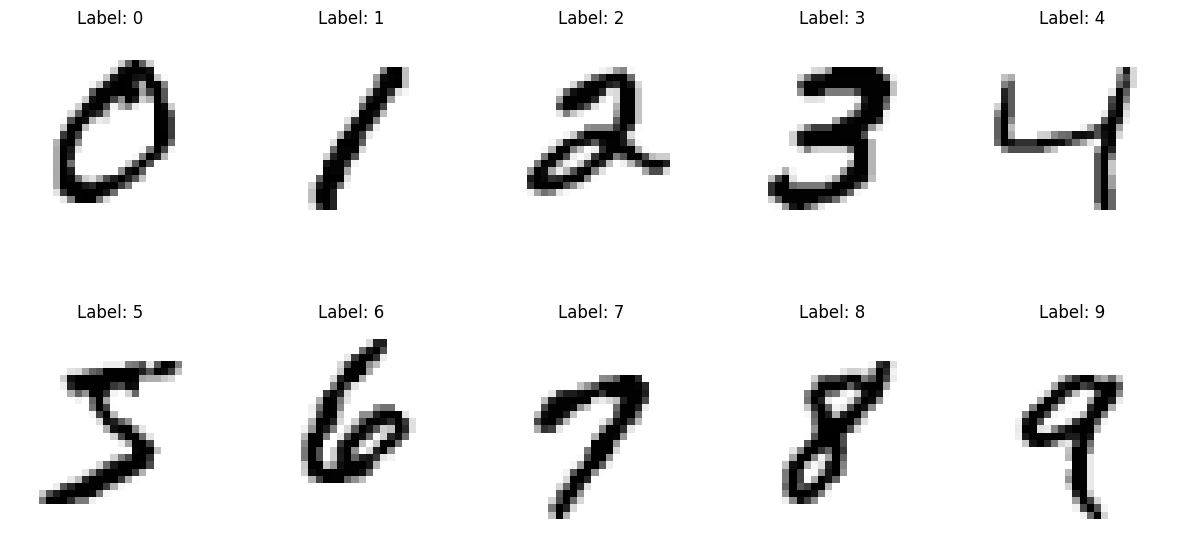

In [3]:
# Plot 10 sample images from the training set with their corresponding labels.
fig, ax = plt.subplots(2, 5, figsize=(15, 7))
ax = ax.flatten()

# Display one example image for each digit label from 0 to 9.
for i in range(10):
    # Get the first image corresponding to label i
    img_idx = np.argwhere(y_train == i)[0][0]
    ax[i].imshow(x_train[img_idx], cmap='gray_r')
    ax[i].set_title(f"Label: {i}", fontsize=12)
    ax[i].axis('off')

### Reshape and one-hot encode the data

In [4]:
# Number of output classes (digits 0 through 9).
nb_classes = 10

# One-hot encode the labels for training and testing sets.
y_train = tf.keras.utils.to_categorical(y_train, num_classes=nb_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=nb_classes)

# Expand image dimensions to add a channel axis (from [28, 28] to [28, 28, 1]).
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

## **Model Training**

#### **Model Description**

This convolutional neural network (CNN) is designed for image classification tasks. It consists of several layers that progressively extract features from the input images and classify them into one of 10 categories.

1. Input Layer: The model accepts input images of shape (28, 28, 1).
2. Convolutional Layers:
    * First Conv Layer: 32 filters of size (3x3), activated by ReLU, followed by max pooling (2x2).
    * Second Conv Layer: 64 filters of size (3x3), activated by ReLU, followed by max pooling (2x2).
    * Third Conv Layer: 128 filters of size (3x3), activated by ReLU, followed by max pooling (2x2).
3. Flatten Layer: Converts the 2D feature maps to a 1D feature vector.
4. Dense Layer: Fully connected layer with 128 neurons, activated by ReLU, and includes a dropout of 20% to prevent overfitting.
5. Output Layer: 10 neurons with softmax activation to classify the input image into one of the 10 categories.

The model is compiled with the Adam optimizer and uses categorical cross-entropy loss, with accuracy as the performance metric.

In [6]:
# Define a sequential Convolutional Neural Network (CNN) model.
model = tf.keras.models.Sequential([
    # First convolutional block: Conv → ReLU → MaxPooling
    # tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Second convolutional block
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', strides=1),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    # Third convolutional block
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', strides=1),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    # Flatten the output to feed into dense layers
    tf.keras.layers.Flatten(),

    # Fully connected dense layer
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # Dropout for regularization

    # Output layer with softmax activation for multi-class classification
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model with Adam optimizer and categorical crossentropy loss
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

I0000 00:00:1756155835.056884  162599 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1024 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:d5:00.0, compute capability: 8.6
I0000 00:00:1756155835.058165  162599 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 22639 MB memory:  -> device: 1, name: Quadro RTX 6000, pci bus id: 0000:17:00.0, compute capability: 7.5
I0000 00:00:1756155835.059241  162599 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 45836 MB memory:  -> device: 2, name: Quadro RTX 8000, pci bus id: 0000:73:00.0, compute capability: 7.5


### Model Summary

In [7]:
# Print a detailed summary of the model architecture,
# including layer types, output shapes, and number of parameters.
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,578 (396.79 KB)

 Trainable params: 101,578 (396.79 KB)

 Non-trainable params: 0 (0.00 B)

### Visualize the CNN Architecture

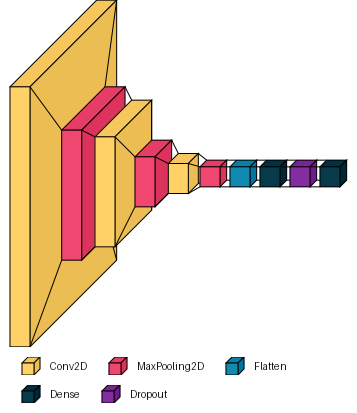

In [8]:
import visualkeras
# Display a layered visual representation of the model architecture.
# 'scale_xy' controls the scaling of the diagram.
# 'legend=True' shows layer types with corresponding color codes.
visualkeras.layered_view(model, scale_xy=10, legend=True)

### Visualize Model Architecture Diagram

In [9]:
# Generate and display a plot of the model architecture,
# showing each layer’s name and output shape.
# tf.keras.utils.plot_model(model, show_shapes=True, dpi = 75)

### Fit the model on training data.

In [ ]:
# Train the model on the training data for 3 epochs.
# The history object stores training metrics and loss values.
# history = model.fit(x_train, y_train, epochs=10, batch_size=128)

Train on 60000 samples


2025-01-21 15:31:30.211264: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 42002 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:d5:00.0, compute capability: 8.6
2025-01-21 15:31:30.316932: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled


Epoch 1/3


2025-01-21 15:31:31.237784: W tensorflow/c/c_api.cc:291] Operation '{name:'training/Adam/dense_1/kernel/m/Assign' id:375 op device:{requested: '', assigned: ''} def:{{{node training/Adam/dense_1/kernel/m/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training/Adam/dense_1/kernel/m, training/Adam/dense_1/kernel/m/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-01-21 15:31:31.540504: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8907
2025-01-21 15:31:31.838883: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


60000/60000 [==============================] - 25s 411us/sample - loss: 0.2193 - accuracy: 0.9326
Epoch 2/3
60000/60000 [==============================] - 22s 372us/sample - loss: 0.0744 - accuracy: 0.9771
Epoch 3/3
60000/60000 [==============================] - 25s 417us/sample - loss: 0.0545 - accuracy: 0.9844


## Load or Save the Trained Model

In [10]:
# If you have trained your own model and want to save it, uncomment and run:
model_path = './mnist10_model.keras'
# model.save(model_path)

# Otherwise, load the pretrained model provided (e.g., from Google Drive or HuggingFace).
!wget https://raw.githubusercontent.com/mnazari123/SecAI_Workshop_Data/main/Models/mnist10_model.keras
model = tf.keras.models.load_model(model_path)

# Display the model architecture summary to make sure the model has successfully been loaded.
model.summary()

--2025-08-25 16:04:14--  https://raw.githubusercontent.com/mnazari123/SecAI_Workshop_Data/main/Models/mnist10_model.keras
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1266398 (1.2M) [application/octet-stream]
Saving to: ‘mnist10_model.keras.2’

mnist10_model.keras 100%[===================>]   1.21M  --.-KB/s    in 0.1s    

2025-08-25 16:04:15 (11.2 MB/s) - ‘mnist10_model.keras.2’ saved [1266398/1266398]



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 304,736 (1.16 MB)

 Trainable params: 101,578 (396.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,158 (793.59 KB)

### Evaluate Model Performance on Test Data

In [11]:
# Evaluate the model on the test dataset and get loss and accuracy.
loss_test, accuracy_test = model.evaluate(x_test, y_test)

# Print the test accuracy as a percentage.
print('Accuracy on test data: {:4.2f}%'.format(accuracy_test * 100))

I0000 00:00:1756155860.142662  163029 service.cc:148] XLA service 0x7f2468005990 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1756155860.142702  163029 service.cc:156]   StreamExecutor device (0): NVIDIA RTX A6000, Compute Capability 8.6
I0000 00:00:1756155860.142708  163029 service.cc:156]   StreamExecutor device (1): Quadro RTX 6000, Compute Capability 7.5
I0000 00:00:1756155860.142712  163029 service.cc:156]   StreamExecutor device (2): Quadro RTX 8000, Compute Capability 7.5
2025-08-25 16:04:20.157518: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1756155860.192094  163029 cuda_dnn.cc:529] Loaded cuDNN version 91200


111/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9853 - loss: 0.0749 

I0000 00:00:1756155860.986133  163029 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9896 - loss: 0.0566
Accuracy on test data: 98.96%


### Wrap the Keras Model with an ART Classifier

In [14]:
# Create an ART KerasClassifier to enable adversarial robustness tools.
# 'clip_values' defines the input data range for normalization and attack generation.
classifier = KerasClassifier(model=model, clip_values=(min_val, max_val))

# **Fast Gradient Method (FGM)**



## Overview

> class art.attacks.evasion.FastGradientMethod(estimator: CLASSIFIER_LOSS_GRADIENTS_TYPE, norm: int | float | str = inf, eps: int | float | ndarray = 0.3, eps_step: int | float | ndarray = 0.1, targeted: bool = False, num_random_init: int = 0, batch_size: int = 32, minimal: bool = False, summary_writer: str | bool | SummaryWriter = False)

This attack was originally implemented by Goodfellow et al. (2015) with the infinity norm (and is known as the “Fast Gradient Sign Method”). This implementation extends the attack to other norms, and is therefore called the Fast Gradient Method.
* Paper link: https://arxiv.org/abs/1412.6572

*\_\_init__(estimator: CLASSIFIER_LOSS_GRADIENTS_TYPE, norm: int | float | str = inf, eps: int | float | ndarray = 0.3, eps_step: int | float | ndarray = 0.1, targeted: bool = False, num_random_init: int = 0, batch_size: int = 32, minimal: bool = False, summary_writer: str | bool | SummaryWriter = False) → None*

**Create a FastGradientMethod instance.**

     Parameters:
* estimator – A trained classifier.
* norm – The norm of the adversarial perturbation. Possible values: “inf”, np.inf, 1 or 2.
* eps – Attack step size (input variation).
* eps_step – Step size of input variation for minimal perturbation computation.
* targeted (bool) – Indicates whether the attack is targeted (True) or untargeted (False)
* num_random_init (int) – Number of random initialisations within the epsilon ball. For random_init=0 starting at the original input.
* batch_size (int) – Size of the batch on which adversarial samples are generated.
* minimal (bool) – Indicates if computing the minimal perturbation (True). If True, also define eps_step for the step size and eps for the maximum perturbation.
* summary_writer – Activate summary writer for TensorBoard. Default is False and deactivated summary writer. If True save runs/CURRENT_DATETIME_HOSTNAME in current directory. If of type str save in path. If of type SummaryWriter apply provided custom summary writer. Use hierarchical folder structure to compare between runs easily. e.g. pass in ‘runs/exp1’, ‘runs/exp2’, etc. for each new experiment to compare across them.

    
**generate(x: ndarray, y: ndarray | None = None, \*\*kwargs) → ndarray**

Generate adversarial samples and return them in an array.

    Return type:
* ndarray
    
    
    Parameters:
* x (ndarray) – An array with the original inputs.
* y – Target values (class labels) one-hot-encoded of shape (nb_samples, nb_classes) or indices of shape (nb_samples,). Only provide this parameter if you’d like to use true labels when crafting adversarial samples. Otherwise, model predictions are used as labels to avoid the “label leaking” effect (explained in this paper: https://arxiv.org/abs/1611.01236). Default is None.

* mask (np.ndarray) – An array with a mask broadcastable to input x defining where to apply adversarial perturbations. Shape needs to be broadcastable to the shape of x and can also be of the same shape as x. Any features for which the mask is zero will not be adversarially perturbed.

        Returns:
* An array holding the adversarial examples.

Link: https://adversarial-robustness-toolbox.readthedocs.io/en/latest/modules/attacks/evasion.html#fast-gradient-method-fgm


### Create an ART Fast Gradient Sign Method attack.

In [15]:
# eps – defines the attack step size (input variation). The smaller the eps, the little the attack scale would be.
attack_fgsm = FastGradientMethod(estimator=classifier, eps=0.2)

## Generate Adversarial Examples Using SimBA Attack

In [16]:
# Reduce test set size to 500 samples for faster adversarial generation and evaluation.
x_test = x_test[:500]
y_test = y_test[:500]

# Generate adversarial examples from the reduced test set using the PGD attack.
x_test_adv = attack_fgsm.generate(x_test)

## Save or Load PGD-Generated Adversarial Test Data

In [17]:
# Option 1: Save your newly generated adversarial test data (uncomment to use).
fgsm_data_path = 'fgsm_poison_data_MNIST10_test_S500.npz'
np.savez(fgsm_data_path,
         x_test_adv=x_test_adv, y_test_adv=y_test)

# Option 2: Load previously saved adversarial test data (recommended for reuse or quick experiments).
# Download the data file from GitHub raw URL
# !wget https://raw.githubusercontent.com/mnazari123/SecAI_Workshop_Data/main/data/pgd_poison_data_MNIST10_test_S500.npz

# x_test_data = np.load(pgd_data_path)
# x_test_adv, y_test = x_test_data['x_test_adv'], x_test_data['y_test_adv']
# x_test_adv.shape, y_test.shape

## Visualize Adversarial Examples and Their Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


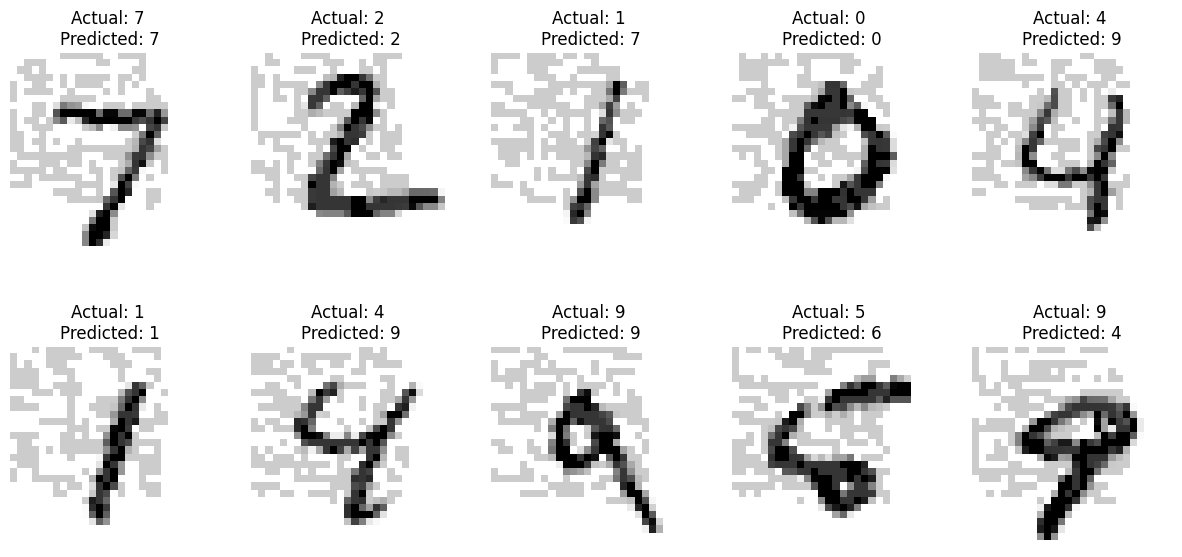

In [18]:
# Display the first 10 adversarial examples along with their actual and predicted labels.
fig, ax = plt.subplots(2, 5, figsize=(15, 7))
ax = ax.flatten()

for i, (image, label) in enumerate(zip(x_test_adv[:10], y_test[:10])):
    # Display the adversarial image.
    ax[i].imshow(image.squeeze(), cmap='gray_r')

    # Show actual and predicted labels.
    prediction = model.predict(np.expand_dims(image, axis=0)).argmax()
    ax[i].set_title(f"Actual: {label.argmax()} \nPredicted: {prediction}", fontsize=12)
    ax[i].axis('off')

## Evaluate the Model on Adversarial Test Data

In [19]:
# Evaluate model performance on adversarial examples.
loss_test, accuracy_test = model.evaluate(x_test_adv, y_test)

# Calculate the average perturbation introduced by the adversarial attack.
perturbation = np.mean(np.abs(x_test_adv - x_test))

# Print evaluation results.
print('Accuracy on adversarial test data: {:4.2f}%'.format(accuracy_test * 100))
print('Average perturbation: {:4.2f}'.format(perturbation))

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.4940 - loss: 2.7728
Accuracy on adversarial test data: 49.40%
Average perturbation: 0.07


# Prepare Training Data for Adversarial Sample Detector

In [20]:
# Generate new adversarial examples from a subset of the training data using PGD.
x_train_adv = attack_fgsm.generate(x_train[:500])
nb_train = x_train[:500].shape[0]

# Combine clean and adversarial samples to create a binary classification dataset for detection.
x_train_detector = np.concatenate((x_train[:500], x_train_adv), axis=0)

# Create labels: [1, 0] for clean samples, [0, 1] for adversarial samples.
y_train_detector = np.concatenate((
    np.array([[1, 0]] * nb_train),  # Clean
    np.array([[0, 1]] * nb_train)   # Adversarial
), axis=0)

##Save or Load Adversarial Detector Training Data

In [21]:
# Option 1: Save generated clean and adversarial samples for training the detector.
np.savez('./fgsm_poison_data_MNIST10_train_S1000.npz',
         x_train_detector=x_train_detector, y_train_detector=y_train_detector)

# Option 2: Load pre-saved detector training data to avoid regeneration.
# detector_data = np.load('./pgd_generated_data/pgd_detector_generated_MNIST10.npz')
# x_train_detector, y_train_detector = detector_data['x_train_detector'], detector_data['y_train_detector']

# Verify the shape of loaded or prepared data.
# x_train_detector.shape, y_train_detector.shape

## Build a similar CNN architecture model for detecting Adversarial Inputs

In [22]:
# Define a CNN model to detect adversarial vs. clean images (binary classification).
detector_model = tf.keras.models.Sequential([
    # First convolutional block
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Second convolutional block
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', strides=1),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    # Third convolutional block
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', strides=1),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    # Classification head
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='softmax')  # Two output classes: [clean, adversarial]
])

# Compile the detector model with Adam optimizer and categorical crossentropy loss.
detector_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## Train the Adversarial Detector Model

In [23]:
# Train the adversarial detector model for 3 epochs.
# Since the goal is to distinguish between clean and adversarial inputs,
# a few epochs (e.g., 3) are typically sufficient to learn this binary classification task.
history = detector_model.fit(x_train_detector, y_train_detector, epochs=10)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.8050 - loss: 0.4719
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9970 - loss: 0.0106
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 2.8322e-04
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 1.3189e-04
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 8.6238e-05
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 8.7730e-05
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 7.0993e-05
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 5.5526e-05
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 4.1498e-05
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 4.7137e-05


In [24]:
# Define path to save/load the detector model
detector_model_path = './FGSM_detector_model_mnist10.keras'
detector_model.save(detector_model_path)

# Load the pre-trained detector model from the specified path
# detector_model = tf.keras.models.load_model(path)

# Display the model architecture to make sure the models has been loaded successfully.
detector_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,328 (1.25 MB)

 Trainable params: 109,442 (427.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,886 (855.03 KB)

## Prepare test samples for the detector model

In [25]:
# Get the number of original test samples
nb_test = x_test.shape[0]

# Combine clean and adversarial test images into one array
x_test_detector = np.concatenate((x_test, x_test_adv), axis=0)

# Create corresponding labels: [1, 0] for clean, [0, 1] for adversarial
y_test_detector = np.concatenate((np.array([[1, 0]] * nb_test),
                                  np.array([[0, 1]] * nb_test)), axis=0)

### Evaluat the result

In [26]:
# --- Evaluate the detector model on combined test data ---

# Evaluate the model's performance on clean + adversarial samples
loss_test, accuracy_test = detector_model.evaluate(x_test_detector, y_test_detector)

# Print the accuracy as a percentage
print('Accuracy on test data: {:4.2f}%'.format(accuracy_test * 100))

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9980 - loss: 0.0026 
Accuracy on test data: 99.80%


## Wrap detector model for adversarial detection

In [27]:
# Wrap the Keras detector model with ART's KerasClassifier
detector_classifier = KerasClassifier(clip_values=(0.0, 0.1), model=detector_model, use_logits=False)

# Create a BinaryInputDetector using the wrapped classifier
detector = BinaryInputDetector(detector_classifier)

## Train the BinaryInputDetector

In [28]:
## Train the BinaryInputDetector

# Train the detector on labeled clean and adversarial training data
detector.fit(x_train_detector, y_train_detector, nb_epochs=3, batch_size=32)

## Evaluating the detector on adversarial data

In [ ]:
# Apply the detector to the adversarial test data
_, is_adversarial = detector.detect(x_test_adv)

# Count how many adversarial samples were flagged
flag_adv = np.sum(is_adversarial)

# Display detection results
print("Adversarial test data (first 500 images):")
print("Flagged: {}".format(flag_adv))
print("Not flagged: {}".format(500 - flag_adv))

Adversarial test data (first 1000 images):
Flagged: 500
Not flagged: 500


## Evaluating the detector on clean (non-adversarial) data

In [30]:
_, is_adversarial = detector.detect(x_test[:100])
flag_original = np.sum(is_adversarial)

print("Original test data (first 100 images):")
print("Flagged: {}".format(flag_original))
print("Not flagged: {}".format(100 - flag_original))

Original test data (first 100 images):
Flagged: 1
Not flagged: 99


## Evaluate the detector across different attack strengths (eps values)


In [31]:
# Note: Detector was trained with adversarial samples generated using eps = 0.2

eps_range = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
nb_flag_adv = []      # Number of adversarial examples flagged by the detector
nb_missclass = []     # Number of adversarial examples that fooled the classifier

for eps in eps_range:
    # Update FGSM attack with current epsilon
    attack_fgsm.set_params(**{'eps': eps})

    # Generate adversarial examples for current eps
    x_test_adv = attack_fgsm.generate(x_test[:100])

    # Count how many were flagged by the detector
    nb_flag_adv.append(np.sum(detector.detect(x_test_adv)[1]))

    # Count how many were misclassified by the classifier
    nb_missclass.append(
        np.sum(np.argmax(classifier.predict(x_test_adv), axis=1) != np.argmax(y_test[:100], axis=1))
    )

# Add clean data evaluation (eps=0) to the results
eps_range = [0] + eps_range
nb_flag_adv = [flag_original] + nb_flag_adv  # flag_original from clean data detection
nb_missclass = [2] + nb_missclass            # 2 misclassifications in clean test subset

## Plot detector performance vs. classifier errors for varying attack strengths

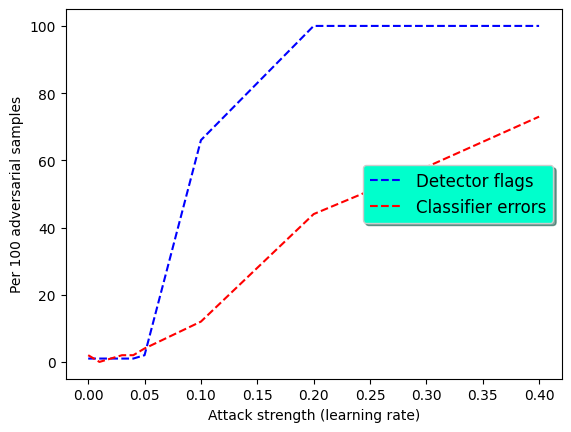

In [32]:
fig, ax = plt.subplots()

# Plot number of adversarial samples flagged by the detector
ax.plot(np.array(eps_range)[:10], np.array(nb_flag_adv)[:10], 'b--', label='Detector flags')

# Plot number of adversarial samples misclassified by the classifier
ax.plot(np.array(eps_range)[:10], np.array(nb_missclass)[:10], 'r--', label='Classifier errors')

# Customize legend
legend = ax.legend(loc='center right', shadow=True, fontsize='large')
legend.get_frame().set_facecolor('#00FFCC')

# Add axis labels
plt.xlabel('Attack strength (learning rate)')
plt.ylabel('Per 100 adversarial samples')

# Display the plot
plt.show()


### Summary:

The Fast Gradient Sign Method (FGSM) is an adversarial attack that perturbs input data to mislead machine learning models. It generates adversarial examples by adding a small, directed perturbation to each input, calculated using the gradient of the loss function with respect to the input. The perturbation is controlled by a parameter $ϵ$, which determines the magnitude of the change. Specifically, the perturbed input is given by $x′=x+ϵ⋅sign(∇xJ(θ,x,y))$. A larger $ϵ$ increases the perturbation, making the attack more likely to succeed but potentially more noticeable.